<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   txn_id        5000 non-null   object 
 1   user_id       5000 non-null   object 
 2   gateway       5000 non-null   object 
 3   payment_type  5000 non-null   object 
 4   region        5000 non-null   object 
 5   device        5000 non-null   object 
 6   amount        5000 non-null   float64
 7   status        5000 non-null   object 
 8   is_fraud      5000 non-null   int64  
 9   latency_ms    5000 non-null   float64
 10  retry_count   5000 non-null   int64  
 11  timestamp     5000 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 468.9+ KB
gateway
Razorpay    0.133808
PayU        0.124320
Stripe      0.115132
Cashfree    0.108590
dtype: float64


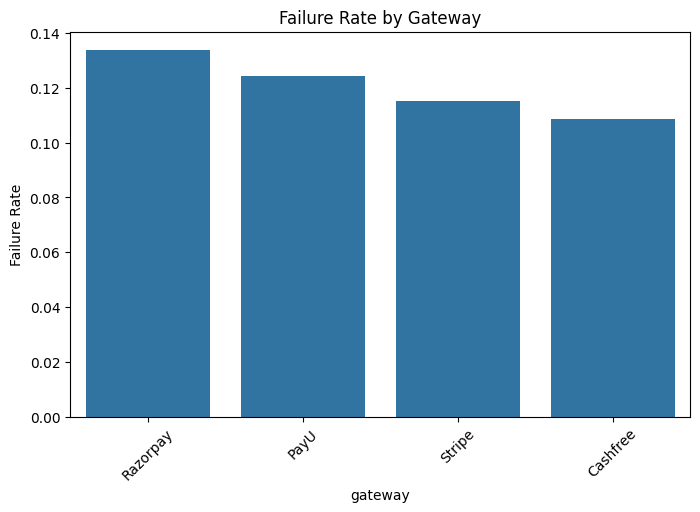

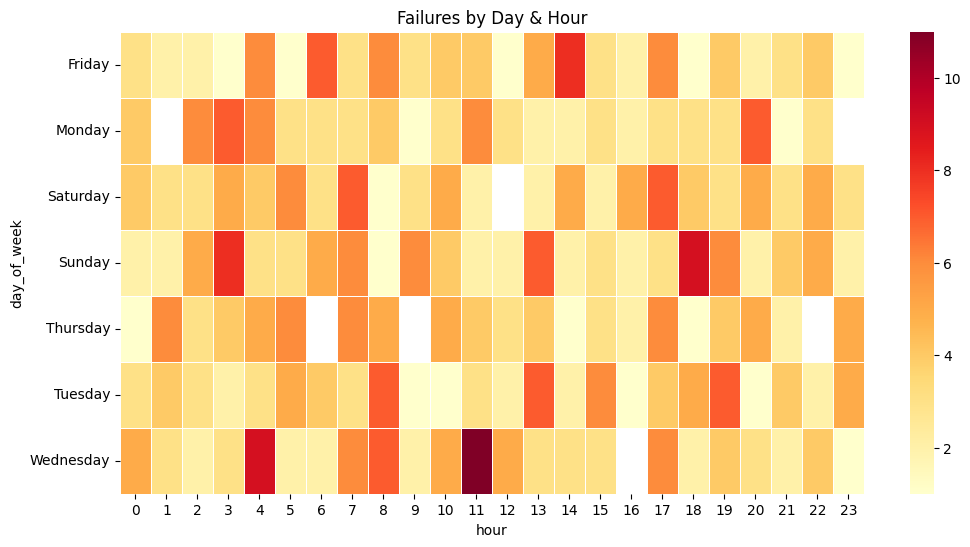

In [3]:
import pandas as pd
df = pd.read_csv("../data/payments_dataset_sample_5k.csv")
df.head()

df.info()
df.describe()
df['status'].value_counts(normalize=True)

df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.day_name()
df['month'] = df['timestamp'].dt.month

failures_by_gateway = df[df['status'] == 'Failed'].groupby('gateway').size()
total_by_gateway = df.groupby('gateway').size()
failure_rate_gateway = (failures_by_gateway / total_by_gateway).sort_values(ascending=False)
print(failure_rate_gateway)

import seaborn as sns
import matplotlib.pyplot as plt

# Gateway-wise failure rate
plt.figure(figsize=(8,5))
sns.barplot(x=failure_rate_gateway.index, y=failure_rate_gateway.values)
plt.title("Failure Rate by Gateway")
plt.ylabel("Failure Rate")
plt.xticks(rotation=45)
plt.show()

# Heatmap: Failure by hour & day
pivot_table = df[df['status'] == 'Failed'].pivot_table(index='day_of_week', columns='hour', values='txn_id', aggfunc='count')
plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, cmap="YlOrRd", linewidths=0.5)
plt.title("Failures by Day & Hour")
plt.show()

